In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Apr 25 02:51:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    22W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf  
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt #for image showing, ploting
from tensorflow import keras

In [ ]:
BATCH_SIZE = 500 # --> =  test dataset size 
IMAGE_SIZE = 64
CHANNELS=3
Epochs = 150
number_of_classes =40

In [ ]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Complete path to storage location of the .zip file of data
zip_path = '../content/drive/My Drive/AIclass/ASLproject/archive.zip'


In [ ]:
import os
# Check current directory 
os.getcwd()

'/content'

In [ ]:
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q 'archive.zip'
# View the unzipped contents in the virtual machine
os.listdir()

['.config', 'test_set', 'drive', 'training_set', 'archive.zip', 'sample_data']

In [ ]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory('/content/training_set',
                                                              seed=12,
                                                              shuffle=True,
                                                              image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                              batch_size=BATCH_SIZE)

class_names = dataset_train.class_names
class_names

Found 60352 files belonging to 40 classes.


['1',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'best of luck',
 'fuck you',
 'i love you',
 'space']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator



data = ImageDataGenerator(rescale= 1. /255, validation_split= 0.2)

training_data = data.flow_from_directory('/content/training_set', target_size=(IMAGE_SIZE,IMAGE_SIZE), shuffle=True, batch_size= BATCH_SIZE, class_mode='categorical', subset='training')

non_shuffle_Training = data.flow_from_directory('/content/training_set', target_size=(IMAGE_SIZE,IMAGE_SIZE), shuffle=False, batch_size= BATCH_SIZE, class_mode='categorical', subset='training')

test_data = data.flow_from_directory('/content/test_set', target_size=(IMAGE_SIZE,IMAGE_SIZE), batch_size = BATCH_SIZE, 
                                     shuffle= False, class_mode= 'categorical', subset= 'validation')

print(training_data.class_indices)

class_names = ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 
               'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
               'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']
print(class_names)


Found 48298 images belonging to 40 classes.
Found 48298 images belonging to 40 classes.
Found 1600 images belonging to 40 classes.
{'1': 0, '10': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'best of luck': 36, 'fuck you': 37, 'i love you': 38, 'space': 39}
['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']


In [ ]:
for image_batch, labels_batch in training_data: # showing all batches 
  print(image_batch.shape,'--->(# of batches, image_size, channel type "RGB=3")')
  print(labels_batch)
  break

(500, 64, 64, 3) --->(# of batches, image_size, channel type "RGB=3")
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#**Visualize some images from dataset randomly**

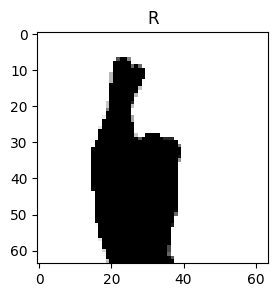

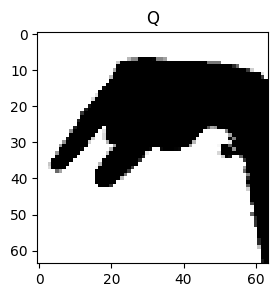

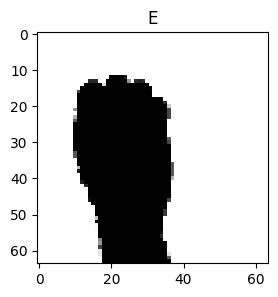

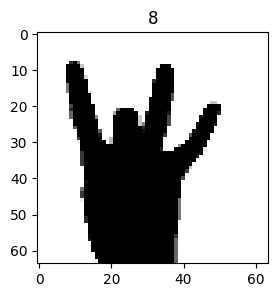

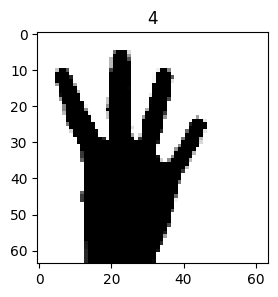

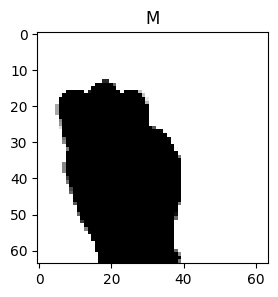

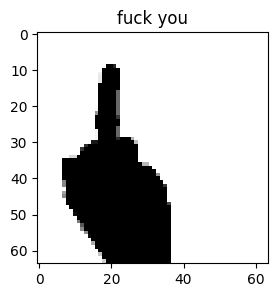

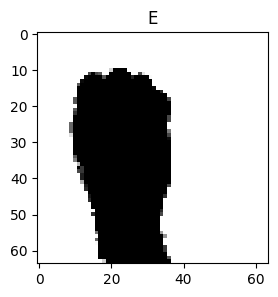

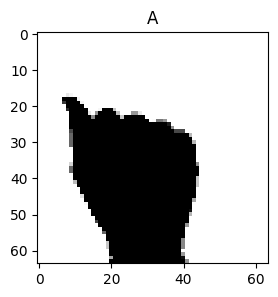

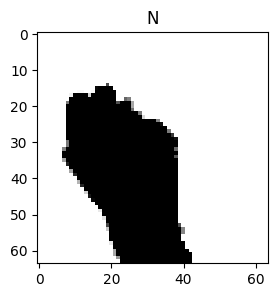

(500, 64, 64, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
{'1': 0, '10': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'best of luck': 36, 'fuck you': 37, 'i love you': 38, 'space': 39}


In [ ]:
import numpy as np

for _ in range(10):
    plt.figure(figsize=(3, 3))
    img, label = training_data.next()
    plt.imshow(img[0])
    class_name = class_names[np.argmax(label[0])] # shows class 
    plt.title(class_name[0:])
    plt.show()
print(img.shape)  #  (10, 200, 200, 3) 
print(label[1])
print(training_data.class_indices)


# **CNN model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential, Model
from keras.applications import VGG16
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization


model=Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
               
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        1216      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 60, 60, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy']) 

In [ ]:
history =model.fit(training_data, batch_size = BATCH_SIZE, epochs = Epochs,  validation_data=test_data,   shuffle = 1)

Epoch 1/150
97/97 [==============================] - 31s 204ms/step - loss: 3.4171 - accuracy: 0.0743 - val_loss: 3.5558 - val_accuracy: 0.1088
Epoch 2/150
97/97 [==============================] - 19s 192ms/step - loss: 2.6153 - accuracy: 0.2813 - val_loss: 3.0690 - val_accuracy: 0.2887
Epoch 3/150
97/97 [==============================] - 19s 196ms/step - loss: 1.8621 - accuracy: 0.4728 - val_loss: 2.2391 - val_accuracy: 0.5769
Epoch 4/150
97/97 [==============================] - 19s 193ms/step - loss: 1.1915 - accuracy: 0.6989 - val_loss: 1.3863 - val_accuracy: 0.8138
Epoch 5/150
97/97 [==============================] - 19s 198ms/step - loss: 0.6989 - accuracy: 0.8613 - val_loss: 0.8503 - val_accuracy: 0.9106
Epoch 6/150
97/97 [==============================] - 19s 193ms/step - loss: 0.4266 - accuracy: 0.9155 - val_loss: 0.6521 - val_accuracy: 0.9137
Epoch 7/150
97/97 [==============================] - 19s 195ms/step - loss: 0.2608 - accuracy: 0.9395 - val_loss: 0.5695 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        1216      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 16)       64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 60, 60, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4

97/97 [==============================] - 18s 180ms/step
[ 0  0  0 ... 39 39 39]
[ 0  0  0 ... 39 39 39]

 Accuracy: 1.000

 CFM: 
 [[1120    0    0 ...    0    0    0]
 [   0 1212    0 ...    0    0    0]
 [   0    0 1120 ...    0    0    0]
 ...
 [   0    0    0 ... 1213    0    0]
 [   0    0    0 ...    0 1245    0]
 [   0    0    0 ...    0    0 1217]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1212
           2       1.00      1.00      1.00      1120
           3       1.00      1.00      1.00      1120
           4       1.00      1.00      1.00      1220
           5       1.00      1.00      1.00      1210
           6       1.00      1.00      1.00      1220
           7       1.00      1.00      1.00      1220
           8       1.00      1.00      1.00      1221
           9       1.00      1.00      1.00      1235
          10       

Text(0.5, 1.0, 'Confusion Matrix')

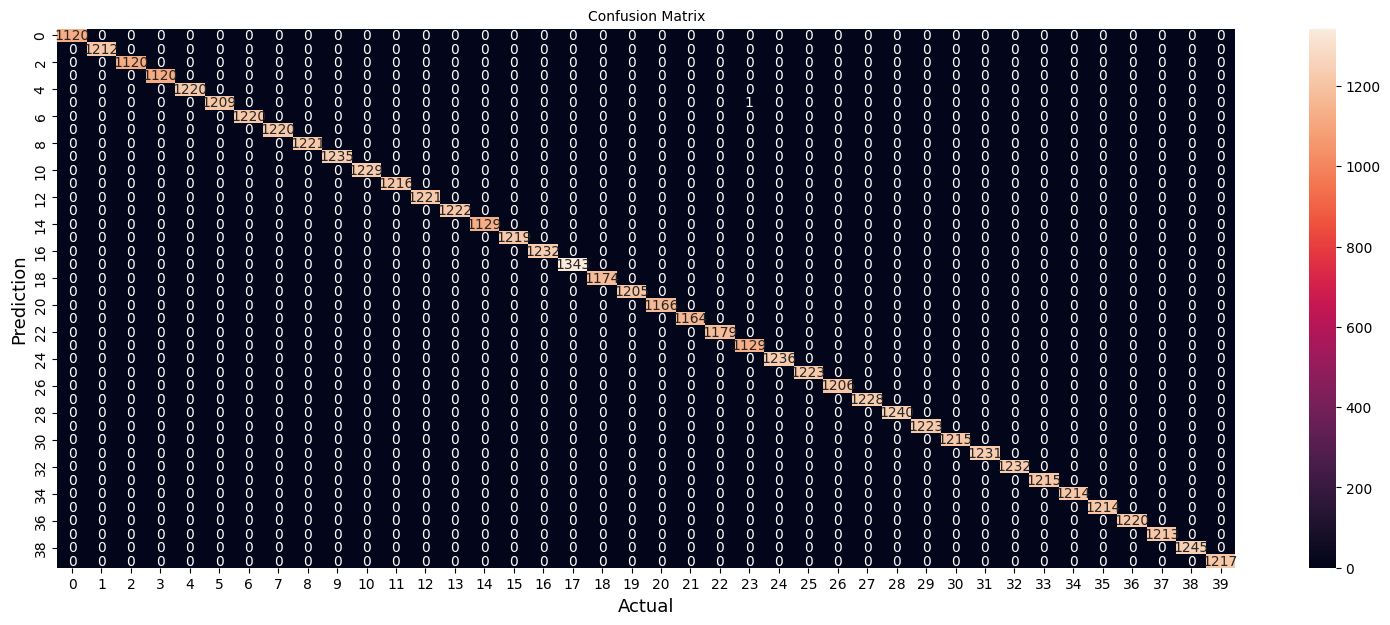

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

training_data.reset()
test_data.reset()

predicted_scores = model.predict(non_shuffle_Training, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

train_labels = non_shuffle_Training.labels

print(train_labels)
print(predicted_labels)

acc_score = accuracy_score(train_labels, predicted_labels)
CFM = confusion_matrix(train_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(train_labels, predicted_labels))


import seaborn as sns
import matplotlib.pyplot as plt     
plt.figure(figsize = (19,7))

sns.heatmap(CFM,
            annot=True, 
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=10)

In [ ]:
scores = model.evaluate(training_data)
print(scores)
print(model.evaluate(training_data))
print(model.evaluate(test_data))


97/97 [==============================] - 19s 192ms/step - loss: 2.5271e-04 - accuracy: 1.0000
[0.0002527100150473416, 0.9999793171882629]
97/97 [==============================] - 18s 182ms/step - loss: 2.5271e-04 - accuracy: 1.0000
[0.00025270995683968067, 0.9999793171882629]
4/4 [==============================] - 1s 133ms/step - loss: 0.5190 - accuracy: 0.9588
[0.5189865827560425, 0.9587500095367432]


In [ ]:
#Save Model
model.save("ASL.h5")

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

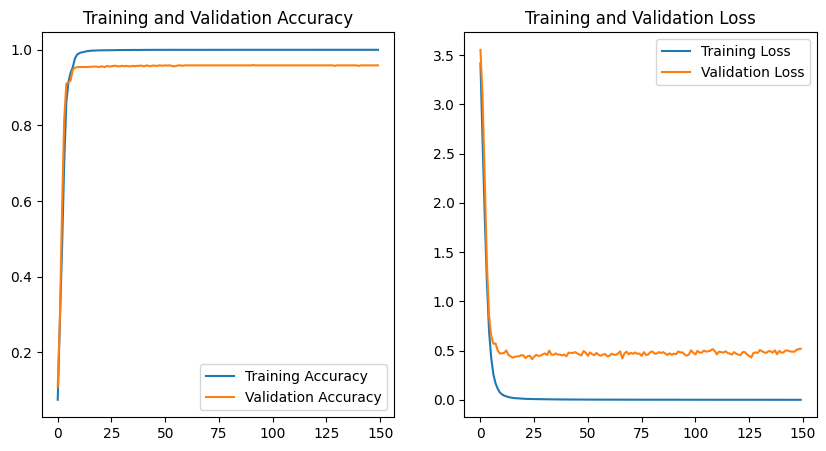

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

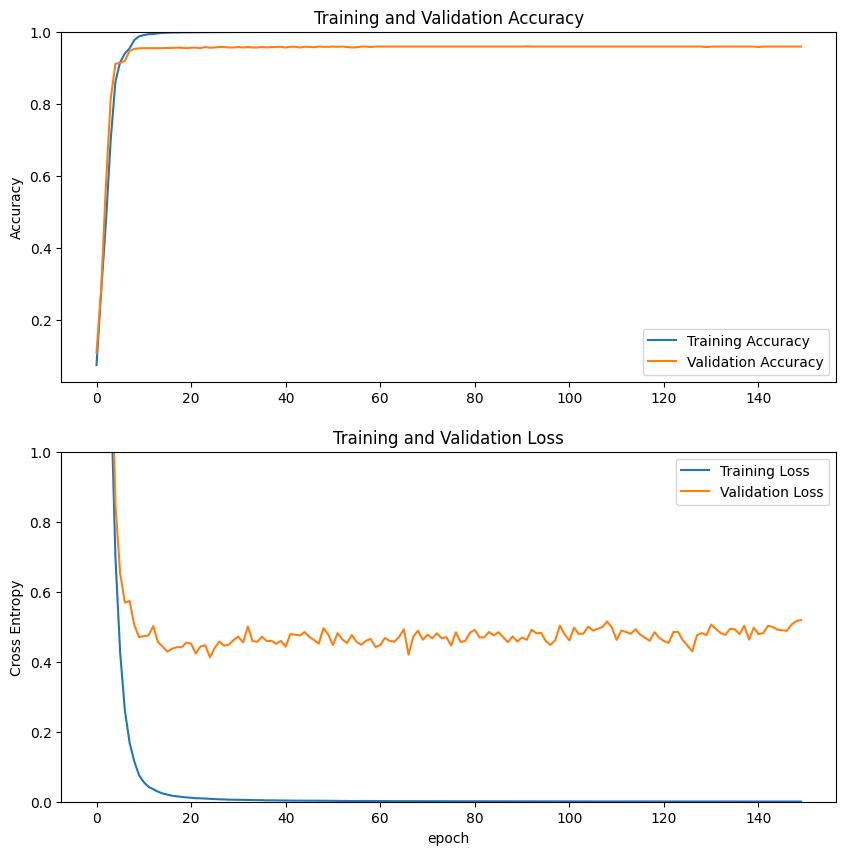

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#** VGG16 Model **

In [ ]:

from keras.applications import VGG16
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

number_of_classes = 40

vgg.summary()
vgg.trainable = False
Input_Layer = input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)
flatten_layer = tf.keras.layers.Flatten()
dense_layer_1 = Dense(2000, activation='relu')
dense_layer_2 = Dense(1000, activation='relu')
dense_layer_3 = Dense(500, activation='relu')
dense_layer_4 = Dense(200, activation='relu')
dense_layer_5 = Dense(50, activation='relu')

predict_layer = Dense(number_of_classes, activation='softmax')

model_vgg = Sequential([
vgg,
flatten_layer, dense_layer_1, dense_layer_2,dense_layer_3,dense_layer_4,dense_layer_5,
predict_layer
])

model_vgg.summary()
model_vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model_vgg.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy']) 
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 2000)              4098000   
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dense_8 (Dense)             (None, 200)               100200    
                                                                 
 dense_9 (Dense)             (None, 50)               

In [ ]:
Classifier_vgg=model_vgg.fit(training_data, batch_size = BATCH_SIZE, epochs = Epochs,  validation_data=test_data,   shuffle = 1)

Epoch 1/150
97/97 [==============================] - 22s 190ms/step - loss: 3.3042 - accuracy: 0.2423 - val_loss: 2.8374 - val_accuracy: 0.4356
Epoch 2/150
97/97 [==============================] - 18s 180ms/step - loss: 2.1912 - accuracy: 0.6605 - val_loss: 1.4428 - val_accuracy: 0.8800
Epoch 3/150
97/97 [==============================] - 17s 179ms/step - loss: 0.8927 - accuracy: 0.9596 - val_loss: 0.5082 - val_accuracy: 0.9862
Epoch 4/150
97/97 [==============================] - 17s 176ms/step - loss: 0.3554 - accuracy: 0.9859 - val_loss: 0.2357 - val_accuracy: 0.9944
Epoch 5/150
97/97 [==============================] - 17s 179ms/step - loss: 0.1847 - accuracy: 0.9931 - val_loss: 0.1407 - val_accuracy: 0.9906
Epoch 6/150
97/97 [==============================] - 17s 178ms/step - loss: 0.1150 - accuracy: 0.9956 - val_loss: 0.0956 - val_accuracy: 0.9981
Epoch 7/150
97/97 [==============================] - 17s 178ms/step - loss: 0.0799 - accuracy: 0.9968 - val_loss: 0.0703 - val_accuracy:

# **Transformer VGG16 Model Quality **

97/97 [==============================] - 17s 170ms/step
[ 0  0  0 ... 39 39 39]
[ 0  0  0 ... 39 39 39]

 Accuracy: 1.000

 CFM: 
 [[1120    0    0 ...    0    0    0]
 [   0 1212    0 ...    0    0    0]
 [   0    0 1120 ...    0    0    0]
 ...
 [   0    0    0 ... 1213    0    0]
 [   0    0    0 ...    0 1245    0]
 [   0    0    0 ...    0    0 1217]]

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1212
           2       1.00      1.00      1.00      1120
           3       1.00      1.00      1.00      1120
           4       1.00      1.00      1.00      1220
           5       1.00      1.00      1.00      1210
           6       1.00      1.00      1.00      1220
           7       1.00      1.00      1.00      1220
           8       1.00      1.00      1.00      1221
           9       1.00      1.00      1.00      1235
          10       

Text(0.5, 1.0, 'Confusion Matrix')

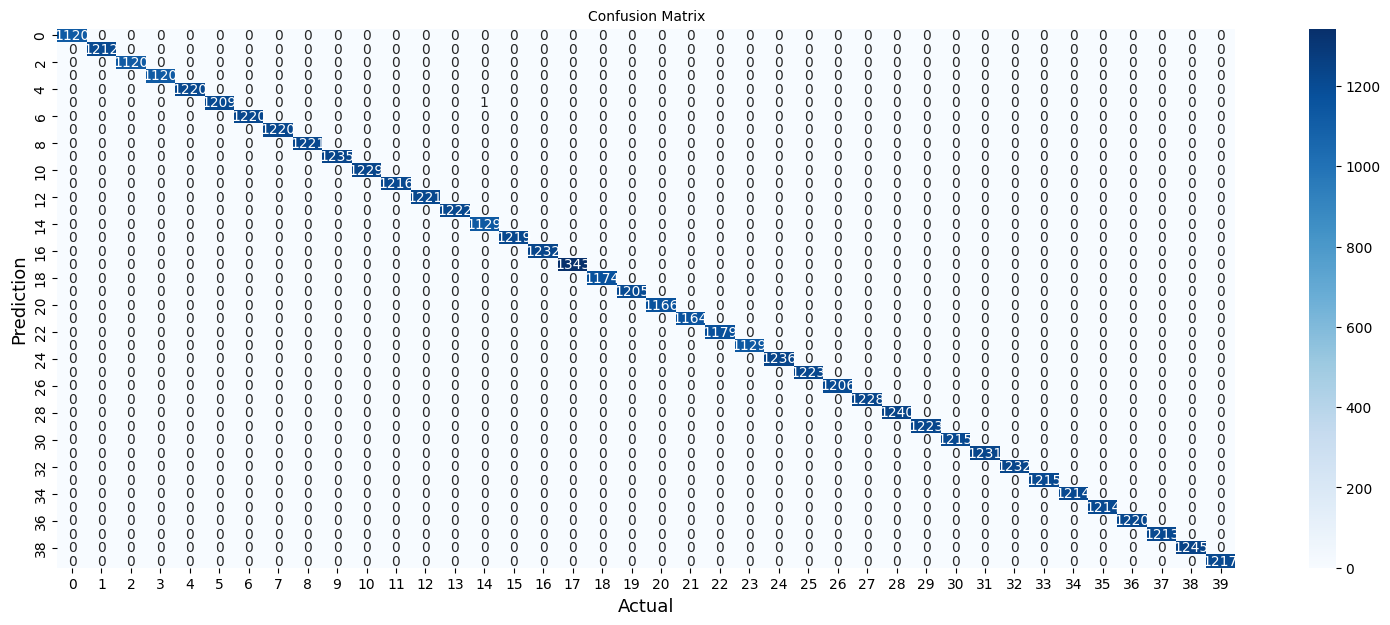

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




predicted_scores_vgg = model_vgg.predict(non_shuffle_Training, verbose=1)
predicted_labels_vgg = predicted_scores_vgg.argmax(axis=1) 

train_labels_vgg = non_shuffle_Training.labels

print(train_labels_vgg)
print(predicted_labels_vgg)

acc_score_vgg = accuracy_score(train_labels_vgg, predicted_labels_vgg)
CFM_vgg = confusion_matrix(train_labels_vgg, predicted_labels_vgg)

print("\n", "Accuracy: " + str(format(acc_score_vgg,'.3f')))
print("\n", "CFM: \n", confusion_matrix(train_labels_vgg, predicted_labels_vgg))
print("\n", "Classification report: \n", classification_report(train_labels_vgg, predicted_labels_vgg))


import seaborn as sns
import matplotlib.pyplot as plt     
#Plot the confusion matrix.
plt.figure(figsize = (19,7))

sns.heatmap(CFM_vgg,
            annot=True, cmap="Blues",
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=10)

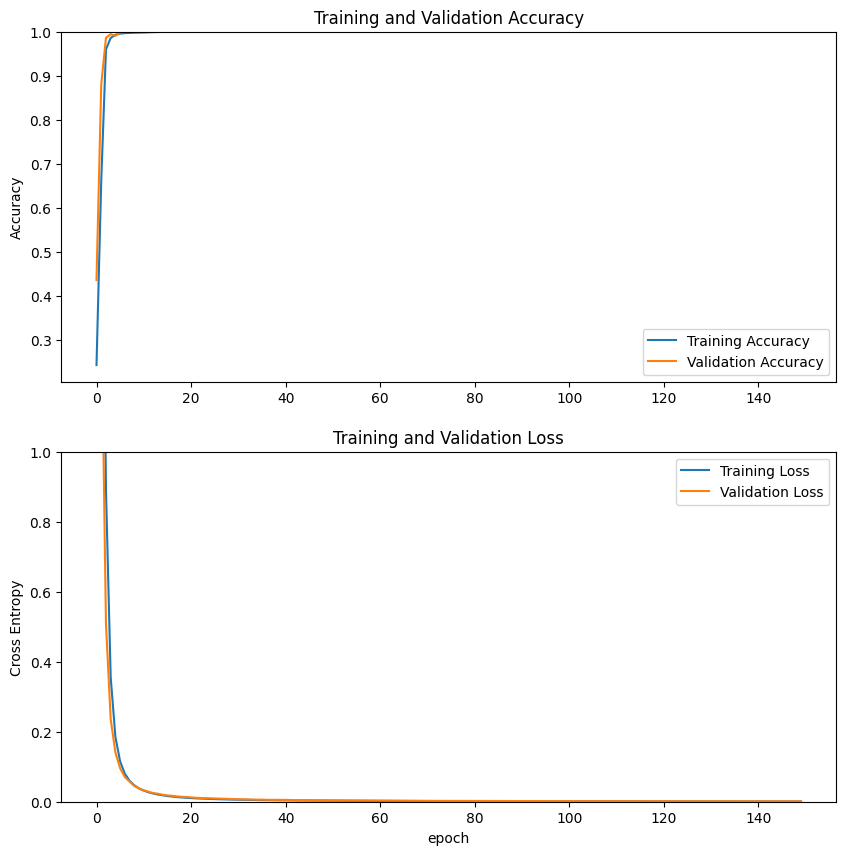

In [ ]:
acc = Classifier_vgg.history['accuracy']
val_acc = Classifier_vgg.history['val_accuracy']

loss = Classifier_vgg.history['loss']
val_loss = Classifier_vgg.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
print(model_vgg.evaluate(training_data))
print(model_vgg.evaluate(test_data))

97/97 [==============================] - 17s 171ms/step - loss: 7.4147e-04 - accuracy: 1.0000
[0.0007414731080643833, 0.9999793171882629]
4/4 [==============================] - 1s 120ms/step - loss: 0.0011 - accuracy: 1.0000
[0.0011081568663939834, 1.0]
